<a href="https://colab.research.google.com/github/Distortedlogic/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Jeremy_Meek_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Distortedlogic/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

df = pd.read_csv(url)
df.drop(df.columns[0], axis=1, inplace=True)

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [0]:
!pip install pandas==0.25.0

In [18]:
age_bins = pd.cut(df['age'], 5)
weight_bins = pd.cut(df['weight'], 14) 
time_bins = pd.cut(df['exercise_time'], 10)
pd.crosstab(age_bins, time_bins)

exercise_time,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(210.0, 240.0]","(240.0, 270.0]","(270.0, 300.0]"
age,,,,,,,,,,
"(17.938, 30.4]",21,31,24,22,23,31,27,34,26,17
"(30.4, 42.8]",24,28,22,33,16,26,22,25,29,28
"(42.8, 55.2]",21,20,23,19,20,19,17,17,33,34
"(55.2, 67.6]",31,15,38,33,17,23,20,21,12,12
"(67.6, 80.0]",52,35,57,45,29,19,8,1,0,0


In [19]:
pd.crosstab(weight_bins, time_bins)

exercise_time,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(210.0, 240.0]","(240.0, 270.0]","(270.0, 300.0]"
weight,,,,,,,,,,
"(99.854, 110.429]",11,7,12,10,14,17,15,14,11,19
"(110.429, 120.857]",8,12,8,7,14,6,11,12,18,20
"(120.857, 131.286]",9,10,13,19,6,16,13,19,26,20
"(131.286, 141.714]",6,8,16,8,10,18,13,17,19,15
"(141.714, 152.143]",13,7,18,7,6,17,12,10,8,14
"(152.143, 162.571]",7,8,18,19,11,10,6,15,15,3
"(162.571, 173.0]",10,12,17,16,10,11,11,10,3,0
"(173.0, 183.429]",8,11,16,18,12,10,9,1,0,0
"(183.429, 193.857]",16,8,11,11,7,8,4,0,0,0


In [17]:
#I dont think this crosstab is good but included to demonstrate multivariant crosstabing
pd.crosstab(time_bins, [age_bins, weight_bins], normalize='columns')

age               (17.938, 30.4]  ...     (67.6, 80.0]
weight         (99.854, 110.429]  ... (235.571, 246.0]
exercise_time                     ...                 
(-0.3, 30.0]            0.000000  ...             0.75
(30.0, 60.0]            0.035714  ...             0.25
(60.0, 90.0]            0.071429  ...             0.00
(90.0, 120.0]           0.035714  ...             0.00
(120.0, 150.0]          0.142857  ...             0.00
(150.0, 180.0]          0.178571  ...             0.00
(180.0, 210.0]          0.071429  ...             0.00
(210.0, 240.0]          0.214286  ...             0.00
(240.0, 270.0]          0.071429  ...             0.00
(270.0, 300.0]          0.178571  ...             0.00

[10 rows x 70 columns]

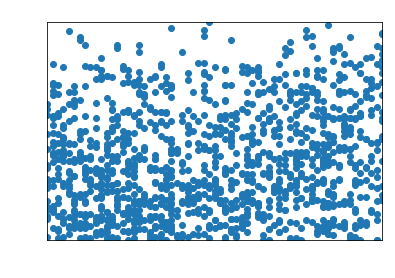

In [63]:
xmin = df['age'].min()
xmax = df['age'].max()
ymin = df['weight'].min()
ymax = df['weight'].max()

hm = plt.scatter(df['age'], df['weight']);
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Age vs Weight", color='w')
plt.xlabel('Age', color='w')
plt.tick_params(axis='x', colors='w')
plt.ylabel('Weight', color='w')
plt.tick_params(axis='y', colors='w')

plt.show()

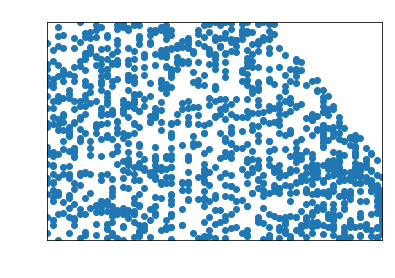

In [60]:
xmin = df['age'].min()
xmax = df['age'].max()
ymin = df['exercise_time'].min()
ymax = df['exercise_time'].max()

hm = plt.scatter(df['age'], df['exercise_time']);
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Age vs Exercise Time", color='w')
plt.xlabel('Age', color='w')
plt.tick_params(axis='x', colors='w')
plt.ylabel('Exercise Time', color='w')
plt.tick_params(axis='y', colors='w')

plt.show()

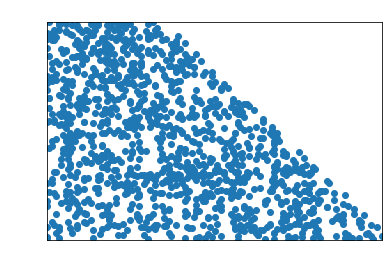

In [61]:
xmin = df['weight'].min()
xmax = df['weight'].max()
ymin = df['exercise_time'].min()
ymax = df['exercise_time'].max()

hm = plt.scatter(df['weight'], df['exercise_time']);
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Weight vs Exercise Time", color='w')
plt.xlabel('Weight', color='w')
plt.tick_params(axis='x', colors='w')
plt.ylabel('Exercise Time', color='w')
plt.tick_params(axis='y', colors='w')

plt.show()

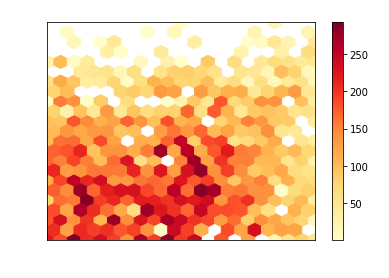

Notice most people who exercise a decent amount are under 60 years old and under 180lb weight.


In [20]:
#color scheme designed for darkmode user

xmin = df['age'].min()
xmax = df['age'].max()
ymin = df['weight'].min()
ymax = df['weight'].max()

hm = plt.hexbin(df['age'], df['weight'], C=df['exercise_time'], gridsize=20, cmap='YlOrRd');
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Hexagon binning", color='w')

plt.xlabel('Age', color='w')
plt.tick_params(axis='x', colors='w')

plt.ylabel('Weight', color='w')
plt.tick_params(axis='y', colors='w')

cb = plt.colorbar(hm)
cb.set_label('Minutes Exercise Per Week', color='w')

plt.show()

print('Notice most people who exercise a decent amount are under 60 years old and under 180lb weight.')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. Integers
2. Both age and weight are somewhat inversely proportional to exercise time, particularly on the boundary. Though, age and weight appear to be uncorrelated (in this example).
3. Both inverse relationships are real. Age vs weight is spuriour in this example.

A confounding variable not account for would be diet.

It is a more important predictor of weight than exercise by far.

'Abs are made in the kitchen, not the gym'

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)